In [11]:
%matplotlib inline


# Reading and plotting XRS data
Purpose:
   Python example of netcdf and plot commands for use with GOES-R EXIS files


In [1]:
import netCDF4 as nc
import numpy as np
import cftime
import matplotlib.pyplot as plt
from datetime import datetime
import os
import requests

num_vars = 2
make_plot = 1

- Relevant data files can be downloaded [here](https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2020/06/)_.
  To run this code, it may be necessary to update the filename version string (“v2-1-0”) to match available files.
- Other data links and information about EXIS data can be found [here](https://www.ngdc.noaa.gov/stp/satellite/goes-r.html)_



In [2]:
dir0 = "./"
file0 = "sci_xrsf-l2-avg1m_g16_s20170207_e20240315_v2-2-0.nc"

# Download `file0` if it does not exist locally
if not os.path.exists(dir0 + file0):
    with open(dir0 + file0, "wb") as f:
        url_path = "https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/"
        r = requests.get(url_path + file0)
        f.write(r.content)

Open netcdf file for reading data



In [3]:
ff = nc.Dataset(dir0 + file0)

In [4]:
ff

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: ACDD-1.3, Spase v2.2.6
    title: L2 XRS 1 minute average
    summary: The EXIS X-Ray Sensor (XRS) measures in a short wavelength channel (XRS-A) between 0.05 and 0.4 nm and in a longer wavelength channel (XRS-B) between 0.1 and 0.8 nm. The X-ray flux average product consists of 1 minute averages of the 1-s X-ray solar measurements. Flux is provided with and without electron contamination removed.
    keywords: NumericalData.MeasurementType.Irradiance
    keywords_vocabulary: SPASE: Space Physics Archive Search and Extract Data Model version 2.2.6, GCMD: NASA Global Change Master Directory (GCMD) Earth Science Keywords version 8.5
    naming_authority: gov.nesdis.noaa
    history: See algorithm information.
    source: GOES-R EXIS/XRS L2 xrsf-l2-flx1s
    processing_level: Level 2
    processing_level_description: Derived products
    license: These data may be redistributed and used 

In [5]:
import xarray as xr

In [6]:
ds = xr.open_dataset(dir0 + file0)

# Convert the dataset to a pandas DataFrame
df = ds.to_dataframe()

# Display the first 10 rows
print(df.head(10))

                                   xrsa_flux  xrsa_flux_observed  \
time                quad_diode                                     
2017-02-07 00:00:00 0           2.949822e-08        1.069688e-07   
                    1           2.949822e-08        1.069688e-07   
                    2           2.949822e-08        1.069688e-07   
                    3           2.949822e-08        1.069688e-07   
2017-02-07 00:01:00 0           2.716477e-08        1.042225e-07   
                    1           2.716477e-08        1.042225e-07   
                    2           2.716477e-08        1.042225e-07   
                    3           2.716477e-08        1.042225e-07   
2017-02-07 00:02:00 0           2.996076e-08        1.060867e-07   
                    1           2.996076e-08        1.060867e-07   

                                xrsa_flux_electrons     xrsb_flux  \
time                quad_diode                                      
2017-02-07 00:00:00 0                  7.7470

In [7]:
# Reset index to include 'time' and 'quad_diode' as columns
df.reset_index(inplace=True)

In [11]:
csv_filename = "level2.csv"
df.to_csv(csv_filename, index=False)

# Print the DataFrame
print(df.head())

   index                time  quad_diode     xrsa_flux  xrsa_flux_observed  \
0      0 2017-02-07 00:00:00           0  2.949822e-08        1.069688e-07   
1      1 2017-02-07 00:00:00           1  2.949822e-08        1.069688e-07   
2      2 2017-02-07 00:00:00           2  2.949822e-08        1.069688e-07   
3      3 2017-02-07 00:00:00           3  2.949822e-08        1.069688e-07   
4      4 2017-02-07 00:01:00           0  2.716477e-08        1.042225e-07   

   xrsa_flux_electrons     xrsb_flux  xrsb_flux_observed  xrsb_flux_electrons  \
0         7.747056e-08  7.072423e-08        1.454065e-07         7.468231e-08   
1         7.747056e-08  7.072423e-08        1.454065e-07         7.468231e-08   
2         7.747056e-08  7.072423e-08        1.454065e-07         7.468231e-08   
3         7.747056e-08  7.072423e-08        1.454065e-07         7.468231e-08   
4         7.705775e-08  6.869706e-08        1.427299e-07         7.403279e-08   

   xrsa_flag  ...  xrsb2_flag  xrsa1_num  xr

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941440 entries, 0 to 14941439
Data columns (total 43 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   time                     datetime64[ns]
 1   quad_diode               int64         
 2   xrsa_flux                float32       
 3   xrsa_flux_observed       float32       
 4   xrsa_flux_electrons      float32       
 5   xrsb_flux                float32       
 6   xrsb_flux_observed       float32       
 7   xrsb_flux_electrons      float32       
 8   xrsa_flag                float32       
 9   xrsb_flag                float32       
 10  xrsa_num                 float32       
 11  xrsb_num                 float32       
 12  xrsa_flag_excluded       float32       
 13  xrsb_flag_excluded       float32       
 14  au_factor                float32       
 15  corrected_current_xrsb2  float32       
 16  roll_angle               float32       
 17  xrsa1_flux               

In [9]:
df

,time,quad_diode,xrsa_flux,xrsa_flux_observed,xrsa_flux_electrons,xrsb_flux,xrsb_flux_observed,xrsb_flux_electrons,xrsa_flag,xrsb_flag,...,xrsb2_flag,xrsa1_num,xrsa2_num,xrsb1_num,xrsb2_num,xrsa1_flag_excluded,xrsa2_flag_excluded,xrsb1_flag_excluded,xrsb2_flag_excluded,yaw_flip_flag
0,2017-02-07 00:00:00,0,2.949822e-08,1.069688e-07,7.747056e-08,7.072423e-08,1.454065e-07,7.468231e-08,4.0,4.0,...,0.0,60.0,60.0,60.0,60.0,0.0,0.0,0.0,0.0,0.0
1,2017-02-07 00:00:00,1,2.949822e-08,1.069688e-07,7.747056e-08,7.072423e-08,1.454065e-07,7.468231e-08,4.0,4.0,...,0.0,60.0,60.0,60.0,60.0,0.0,0.0,0.0,0.0,0.0
2,2017-02-07 00:00:00,2,2.949822e-08,1.069688e-07,7.747056e-08,7.072423e-08,1.454065e-07,7.468231e-08,4.0,4.0,...,0.0,60.0,60.0,60.0,60.0,0.0,0.0,0.0,0.0,0.0
3,2017-02-07 00:00:00,3,2.949822e-08,1.069688e-07,7.747056e-08,7.072423e-08,1.454065e-07,7.468231e-08,4.0,4.0,...,0.0,60.0,60.0,60.0,60.0,0.0,0.0,0.0,0.0,0.0
4,2017-02-07 00:01:00,0,2.716477e-08,1.042225e-07,7.705775e-08,6.869706e-08,1.427299e-07,7.403279e-08,4.0,4.0,...,0.0,59.0,60.0,60.0,60.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14941435,2024-03-15 23:58:00,3,1.772855e-08,2.784142e-08,1.011287e-08,8.256415e-07,8.498643e-07,2.422288e-08,0.0,0.0,...,0.0,60.0,60.0,60.0,60.0,0.0,0.0,0.0,0.0,0.0
14941436,2024-03-15 23:59:00,0,1.912183e-08,2.924372e-08,1.012188e-08,8.249229e-07,8.491998e-07,2.427685e-08,0.0,0.0,...,0.0,60.0,59.0,60.0,60.0,0.0,2.0,0.0,0.0,0.0
14941437,2024-03-15 23:59:00,1,1.912183e-08,2.924372e-08,1.012188e-08,8.249229e-07,8.491998e-07,2.427685e-08,0.0,0.0,...,0.0,60.0,59.0,60.0,60.0,0.0,2.0,0.0,0.0,0.0
14941438,2024-03-15 23:59:00,2,1.912183e-08,2.924372e-08,1.012188e-08,8.249229e-07,8.491998e-07,2.427685e-08,0.0,0.0,...,0.0,60.0,59.0,60.0,60.0,0.0,2.0,0.0,0.0,0.0


In [10]:
df.rename(columns={'time':'datetime'}, inplace=True)

Read in the flares dataset which was extracted from flsum data only extracting the peak flares

In [11]:
import pandas as pd
df1=pd.read_csv('/Users/anilareddy/Downloads/flares.csv')

In [12]:
df1

,xrsb_flux,status,time,background_flux,flare_class,integrated_flux,flare_id,datetime
0,1.114654e-07,EVENT_START,539872860.0,1.159177e-07,NaN,0.000056,201702090041,2017-02-09 00:41:00
1,3.800934e-07,EVENT_PEAK,539873400.0,1.159177e-07,B3.8,0.000195,201702090041,2017-02-09 00:50:00
2,2.325111e-07,EVENT_END,539873820.0,1.159177e-07,NaN,0.000254,201702090041,2017-02-09 00:57:00
3,1.151511e-07,POST_EVENT,539874780.0,NaN,NaN,NaN,201702090041,2017-02-09 01:13:00
4,9.893294e-08,EVENT_START,539875800.0,1.072574e-07,NaN,0.000067,201702090130,2017-02-09 01:30:00
...,...,...,...,...,...,...,...,...
37358,9.339268e-07,POST_EVENT,763546740.0,NaN,NaN,NaN,202403121735,2024-03-12 20:19:00
37359,6.326993e-07,EVENT_START,763553040.0,6.139741e-07,NaN,0.000291,202403122204,2024-03-12 22:04:00
37360,1.007705e-06,EVENT_PEAK,763553280.0,6.139741e-07,C1.0,0.000388,202403122204,2024-03-12 22:08:00
37361,7.349201e-07,EVENT_END,763553520.0,6.139741e-07,NaN,0.000432,202403122204,2024-03-12 22:12:00


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37363 entries, 0 to 37362
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   xrsb_flux        37363 non-null  float64
 1   status           37363 non-null  object 
 2   time             37363 non-null  float64
 3   background_flux  30690 non-null  float64
 4   flare_class      10087 non-null  object 
 5   integrated_flux  30693 non-null  float64
 6   flare_id         37363 non-null  int64  
 7   datetime         37363 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 2.3+ MB


In [14]:
df1['datetime'] = pd.to_datetime(df1['datetime'])

In [15]:
columns_to_keep = ['datetime', 'xrsb_flux', 'au_factor', 'quad_diode']  # Add the columns you want to keep to this list
df2 = df[columns_to_keep]

In [16]:
df2=df2.rename(columns={'xrsb_flux':'xrsb_flux_1min'})

merging 1min avg and summary data on timestamps

In [17]:
merged_df = pd.merge(df2, df1, on='datetime', how='inner')

In [18]:
merged_df = merged_df[merged_df['quad_diode'] == 0]

In [19]:
merged_df

,datetime,xrsb_flux_1min,au_factor,quad_diode,xrsb_flux,status,time,background_flux,flare_class,integrated_flux,flare_id
0,2017-02-09 00:41:00,1.114654e-07,0.973355,0,1.114654e-07,EVENT_START,539872860.0,1.159177e-07,NaN,0.000056,201702090041
4,2017-02-09 00:50:00,3.800934e-07,0.973357,0,3.800934e-07,EVENT_PEAK,539873400.0,1.159177e-07,B3.8,0.000195,201702090041
8,2017-02-09 00:57:00,2.325111e-07,0.973359,0,2.325111e-07,EVENT_END,539873820.0,1.159177e-07,NaN,0.000254,201702090041
12,2017-02-09 01:13:00,1.151511e-07,0.973362,0,1.151511e-07,POST_EVENT,539874780.0,NaN,NaN,NaN,201702090041
16,2017-02-09 01:30:00,9.893294e-08,0.973366,0,9.893294e-08,EVENT_START,539875800.0,1.072574e-07,NaN,0.000067,201702090130
...,...,...,...,...,...,...,...,...,...,...,...
149432,2024-03-12 20:19:00,9.339268e-07,0.987850,0,9.339268e-07,POST_EVENT,763546740.0,NaN,NaN,NaN,202403121735
149436,2024-03-12 22:04:00,6.326993e-07,0.987889,0,6.326993e-07,EVENT_START,763553040.0,6.139741e-07,NaN,0.000291,202403122204
149440,2024-03-12 22:08:00,1.007705e-06,0.987890,0,1.007705e-06,EVENT_PEAK,763553280.0,6.139741e-07,C1.0,0.000388,202403122204
149444,2024-03-12 22:12:00,7.349201e-07,0.987892,0,7.349201e-07,EVENT_END,763553520.0,6.139741e-07,NaN,0.000432,202403122204


In [20]:
columns_to_drop = ['xrsb_flux','time','quad_diode']  # Add the columns you want to drop to this list
merged_df = merged_df.drop(columns=columns_to_drop)

In [21]:
merged_df

,datetime,xrsb_flux_1min,au_factor,status,background_flux,flare_class,integrated_flux,flare_id
0,2017-02-09 00:41:00,1.114654e-07,0.973355,EVENT_START,1.159177e-07,NaN,0.000056,201702090041
4,2017-02-09 00:50:00,3.800934e-07,0.973357,EVENT_PEAK,1.159177e-07,B3.8,0.000195,201702090041
8,2017-02-09 00:57:00,2.325111e-07,0.973359,EVENT_END,1.159177e-07,NaN,0.000254,201702090041
12,2017-02-09 01:13:00,1.151511e-07,0.973362,POST_EVENT,NaN,NaN,NaN,201702090041
16,2017-02-09 01:30:00,9.893294e-08,0.973366,EVENT_START,1.072574e-07,NaN,0.000067,201702090130
...,...,...,...,...,...,...,...,...
149432,2024-03-12 20:19:00,9.339268e-07,0.987850,POST_EVENT,NaN,NaN,NaN,202403121735
149436,2024-03-12 22:04:00,6.326993e-07,0.987889,EVENT_START,6.139741e-07,NaN,0.000291,202403122204
149440,2024-03-12 22:08:00,1.007705e-06,0.987890,EVENT_PEAK,6.139741e-07,C1.0,0.000388,202403122204
149444,2024-03-12 22:12:00,7.349201e-07,0.987892,EVENT_END,6.139741e-07,NaN,0.000432,202403122204


multiply the xrsb-flux (i.e., irradiance) by the au_factor 
This normalizes the XRS irradiance as measured at Earth to as if it were measured at the 1AU distance and will make step 5 easier

In [22]:
merged_df['xrsb_flux_norm']  = merged_df['xrsb_flux_1min'] * merged_df['au_factor']

Subtract the background flux from each flare's time series

In [23]:
merged_df['xrsb_flux_norm'] = merged_df['xrsb_flux_norm'] - merged_df['background_flux']

In [24]:
merged_df

,datetime,xrsb_flux_1min,au_factor,status,background_flux,flare_class,integrated_flux,flare_id,xrsb_flux_norm
0,2017-02-09 00:41:00,1.114654e-07,0.973355,EVENT_START,1.159177e-07,NaN,0.000056,201702090041,-7.422281e-09
4,2017-02-09 00:50:00,3.800934e-07,0.973357,EVENT_PEAK,1.159177e-07,B3.8,0.000195,201702090041,2.540488e-07
8,2017-02-09 00:57:00,2.325111e-07,0.973359,EVENT_END,1.159177e-07,NaN,0.000254,201702090041,1.103990e-07
12,2017-02-09 01:13:00,1.151511e-07,0.973362,POST_EVENT,NaN,NaN,NaN,201702090041,NaN
16,2017-02-09 01:30:00,9.893294e-08,0.973366,EVENT_START,1.072574e-07,NaN,0.000067,201702090130,-1.095945e-08
...,...,...,...,...,...,...,...,...,...
149432,2024-03-12 20:19:00,9.339268e-07,0.987850,POST_EVENT,NaN,NaN,NaN,202403121735,NaN
149436,2024-03-12 22:04:00,6.326993e-07,0.987889,EVENT_START,6.139741e-07,NaN,0.000291,202403122204,1.106241e-08
149440,2024-03-12 22:08:00,1.007705e-06,0.987890,EVENT_PEAK,6.139741e-07,C1.0,0.000388,202403122204,3.815276e-07
149444,2024-03-12 22:12:00,7.349201e-07,0.987892,EVENT_END,6.139741e-07,NaN,0.000432,202403122204,1.120473e-07


In [25]:
merged_df = merged_df[(merged_df['status'] == 'EVENT_START') | (merged_df['status'] == 'EVENT_PEAK') |(merged_df['status'] == 'EVENT_END')]

In [26]:
merged_df

,datetime,xrsb_flux_1min,au_factor,status,background_flux,flare_class,integrated_flux,flare_id,xrsb_flux_norm
0,2017-02-09 00:41:00,1.114654e-07,0.973355,EVENT_START,1.159177e-07,NaN,0.000056,201702090041,-7.422281e-09
4,2017-02-09 00:50:00,3.800934e-07,0.973357,EVENT_PEAK,1.159177e-07,B3.8,0.000195,201702090041,2.540488e-07
8,2017-02-09 00:57:00,2.325111e-07,0.973359,EVENT_END,1.159177e-07,NaN,0.000254,201702090041,1.103990e-07
16,2017-02-09 01:30:00,9.893294e-08,0.973366,EVENT_START,1.072574e-07,NaN,0.000067,201702090130,-1.095945e-08
20,2017-02-09 01:40:00,4.395089e-07,0.973369,EVENT_PEAK,1.072574e-07,B4.3,0.000160,201702090130,3.205468e-07
...,...,...,...,...,...,...,...,...,...
149424,2024-03-12 18:15:00,2.751654e-06,0.987805,EVENT_PEAK,9.427970e-07,C2.7,0.005776,202403121735,1.775300e-06
149428,2024-03-12 18:37:00,1.822509e-06,0.987813,EVENT_END,9.427970e-07,NaN,0.008297,202403121735,8.575006e-07
149436,2024-03-12 22:04:00,6.326993e-07,0.987889,EVENT_START,6.139741e-07,NaN,0.000291,202403122204,1.106241e-08
149440,2024-03-12 22:08:00,1.007705e-06,0.987890,EVENT_PEAK,6.139741e-07,C1.0,0.000388,202403122204,3.815276e-07


In [27]:
merged_df.reset_index(drop=True, inplace=True)

In [30]:
csv_filename = "merged_flares.csv"
merged_df.to_csv(csv_filename, index=False)

In [28]:
merged_df=pd.read_csv('/Users/anilareddy/Downloads/merged_flares.csv')

In [29]:
merged_df

,datetime,xrsb_flux_1min,au_factor,status,background_flux,flare_class,integrated_flux,flare_id,xrsb_flux_norm
0,2017-02-09 00:41:00,1.114654e-07,0.973355,EVENT_START,1.159177e-07,NaN,0.000056,201702090041,-7.422281e-09
1,2017-02-09 00:50:00,3.800934e-07,0.973357,EVENT_PEAK,1.159177e-07,B3.8,0.000195,201702090041,2.540488e-07
2,2017-02-09 00:57:00,2.325111e-07,0.973359,EVENT_END,1.159177e-07,NaN,0.000254,201702090041,1.103990e-07
3,2017-02-09 01:30:00,9.893294e-08,0.973366,EVENT_START,1.072574e-07,NaN,0.000067,201702090130,-1.095945e-08
4,2017-02-09 01:40:00,4.395089e-07,0.973369,EVENT_PEAK,1.072574e-07,B4.3,0.000160,201702090130,3.205468e-07
...,...,...,...,...,...,...,...,...,...
28974,2024-03-12 18:15:00,2.751654e-06,0.987805,EVENT_PEAK,9.427970e-07,C2.7,0.005776,202403121735,1.775300e-06
28975,2024-03-12 18:37:00,1.822509e-06,0.987813,EVENT_END,9.427970e-07,NaN,0.008297,202403121735,8.575006e-07
28976,2024-03-12 22:04:00,6.326993e-07,0.987889,EVENT_START,6.139741e-07,NaN,0.000291,202403122204,1.106241e-08
28977,2024-03-12 22:08:00,1.007705e-06,0.987890,EVENT_PEAK,6.139741e-07,C1.0,0.000388,202403122204,3.815276e-07


Integrate the background-subtracted irradiance time series between each flare's start and end time
(integrating across the number of seconds rather than the number of minutes to get units of J/m2)

In [30]:
import numpy as np
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])

# Initialize a list of NaN values with the same length as the DataFrame
integrated_irradiances = [np.nan] * len(merged_df)

# Iterate over each flare interval
for index, start_row in merged_df[merged_df['status'] == 'EVENT_START'].iterrows():
    # Find the corresponding flare end time
    end_row = merged_df[(merged_df['datetime'] > start_row['datetime']) & (merged_df['status'] == 'EVENT_END')].iloc[0]
    
    # Filter data within the flare interval
    interval_data = merged_df[(merged_df['datetime'] >= start_row['datetime']) & (merged_df['datetime'] <= end_row['datetime'])]
    
    # Integrate the background-subtracted irradiance for this flare interval
    integrated_flux = interval_data['xrsb_flux_norm'].sum()
    
    # Calculate the duration of the flare interval in seconds
    duration_seconds = (end_row['datetime'] - start_row['datetime']).total_seconds()
    
    # Multiply by the duration to get energy
    integrated_energy = integrated_flux * duration_seconds
    
    # Assign the integrated irradiance value to the corresponding index
    integrated_irradiances[start_row.name:end_row.name + 1] = [integrated_energy] * len(interval_data)

# Add the integrated_irradiances list as a new column in the DataFrame
merged_df['integrated_irradiance'] = integrated_irradiances[:len(merged_df)]

# Display the resulting DataFrame
print(merged_df)


                 datetime  xrsb_flux_1min  au_factor       status  \
0     2017-02-09 00:41:00    1.114654e-07   0.973355  EVENT_START   
1     2017-02-09 00:50:00    3.800934e-07   0.973357   EVENT_PEAK   
2     2017-02-09 00:57:00    2.325111e-07   0.973359    EVENT_END   
3     2017-02-09 01:30:00    9.893294e-08   0.973366  EVENT_START   
4     2017-02-09 01:40:00    4.395089e-07   0.973369   EVENT_PEAK   
...                   ...             ...        ...          ...   
28974 2024-03-12 18:15:00    2.751654e-06   0.987805   EVENT_PEAK   
28975 2024-03-12 18:37:00    1.822509e-06   0.987813    EVENT_END   
28976 2024-03-12 22:04:00    6.326993e-07   0.987889  EVENT_START   
28977 2024-03-12 22:08:00    1.007705e-06   0.987890   EVENT_PEAK   
28978 2024-03-12 22:12:00    7.349201e-07   0.987892    EVENT_END   

       background_flux flare_class  integrated_flux      flare_id  \
0         1.159177e-07         NaN         0.000056  201702090041   
1         1.159177e-07        B3.

In [31]:
merged_df.head(n=10)

,datetime,xrsb_flux_1min,au_factor,status,background_flux,flare_class,integrated_flux,flare_id,xrsb_flux_norm,integrated_irradiance
0,2017-02-09 00:41:00,1.114654e-07,0.973355,EVENT_START,1.159177e-07,NaN,0.000056,201702090041,-7.422281e-09,0.000343
1,2017-02-09 00:50:00,3.800934e-07,0.973357,EVENT_PEAK,1.159177e-07,B3.8,0.000195,201702090041,2.540488e-07,0.000343
2,2017-02-09 00:57:00,2.325111e-07,0.973359,EVENT_END,1.159177e-07,NaN,0.000254,201702090041,1.103990e-07,0.000343
3,2017-02-09 01:30:00,9.893294e-08,0.973366,EVENT_START,1.072574e-07,NaN,0.000067,201702090130,-1.095945e-08,0.000291
4,2017-02-09 01:40:00,4.395089e-07,0.973369,EVENT_PEAK,1.072574e-07,B4.3,0.000160,201702090130,3.205468e-07,0.000291
5,2017-02-09 01:44:00,1.483600e-07,0.973370,EVENT_END,1.072574e-07,NaN,0.000169,201702090130,3.715165e-08,0.000291
6,2017-02-09 01:45:00,1.317124e-07,0.973370,EVENT_START,1.768865e-07,NaN,0.000100,201702090145,-4.868163e-08,0.001316
7,2017-02-09 01:51:00,1.702064e-06,0.973371,EVENT_PEAK,1.768865e-07,C1.7,0.000546,201702090145,1.479854e-06,0.001316
8,2017-02-09 01:56:00,7.596219e-07,0.973372,EVENT_END,1.768865e-07,NaN,0.000648,201702090145,5.625085e-07,0.001316
9,2017-02-09 02:31:00,2.060258e-07,0.973381,EVENT_START,2.076109e-07,NaN,0.000120,201702090231,-7.069447e-09,0.000141


In [32]:
rows_with_nan = merged_df[merged_df['integrated_irradiance'].isna()]

In [33]:
rows_with_nan 

,datetime,xrsb_flux_1min,au_factor,status,background_flux,flare_class,integrated_flux,flare_id,xrsb_flux_norm,integrated_irradiance
12660,2022-02-10 00:02:00,1.246705e-06,0.973555,EVENT_PEAK,7.322567e-07,C1.2,0.000899,202202092351,4.814786e-07,NaN
12661,2022-02-10 00:10:00,9.281931e-07,0.973557,EVENT_END,7.322567e-07,NaN,0.001199,202202092351,1.713917e-07,NaN
15671,2022-08-18 00:01:00,1.832063e-06,1.024847,EVENT_END,4.970262e-07,NaN,0.006083,202208172316,1.380559e-06,NaN
16427,2022-09-17 00:04:00,1.789812e-06,1.010566,EVENT_PEAK,1.239138e-06,C1.7,0.001590,202209162350,5.695861e-07,NaN
16428,2022-09-17 00:09:00,1.477459e-06,1.010565,EVENT_END,1.239138e-06,NaN,0.001769,202209162350,2.539299e-07,NaN
23367,2023-07-18 00:06:00,5.720820e-05,1.033029,EVENT_PEAK,4.889051e-05,M5.7,0.106587,202307172337,1.020721e-05,NaN
23368,2023-07-18 00:23:00,5.211906e-05,1.033027,EVENT_END,4.889051e-05,NaN,0.152760,202307172337,4.949907e-06,NaN
23519,2023-07-26 00:09:00,2.748931e-06,1.031714,EVENT_END,1.680770e-06,NaN,0.006285,202307252338,1.155342e-06,NaN
25873,2023-11-12 00:05:00,1.765934e-06,0.980182,EVENT_PEAK,8.368429e-07,C1.7,0.001524,202311112350,8.940943e-07,NaN
25874,2023-11-12 00:18:00,1.219215e-06,0.980178,EVENT_END,8.368429e-07,NaN,0.002325,202311112350,3.582052e-07,NaN


Multiplying the integrated flare irradiance by 4*pi*(d_1AU)^2
d_1AU is the earth-sun average distance (149,597,870,700 meters)
Convert J to ergs by multiplying by 1.e+7

In [34]:
import numpy as np

# Multiply the integrated flare irradiance by 4*pi*(d_1AU)^2
d_1AU = 149597870700  # Earth-Sun average distance in meters
solar_irradiance_constant = 4 * np.pi * (d_1AU ** 2)

# Initialize a list to store the multiplied values
multiplied_irradiances = []

# Iterate over the integrated irradiances
for integrated_irradiance in merged_df['integrated_irradiance']:
    # Multiply by solar irradiance constant
    multiplied_irradiance = integrated_irradiance * solar_irradiance_constant
    # Append the multiplied value to the list
    multiplied_irradiances.append(multiplied_irradiance)

# Convert J to ergs by multiplying by 1.e-7
# Initialize a list to store the converted values
flare_energy = []

# Iterate over the multiplied irradiances
for multiplied_irradiance in multiplied_irradiances:
    # Convert J to ergs
    converted_energy = multiplied_irradiance * 1.e+7
    # Append the converted value to the list
    flare_energy.append(converted_energy)

# Add the multiplied and converted irradiances as new columns in the DataFrame
merged_df['multiplied_irradiance'] = multiplied_irradiances
merged_df['flare_energy'] = flare_energy

# Display the resulting DataFrame
print(merged_df)



                 datetime  xrsb_flux_1min  au_factor       status  \
0     2017-02-09 00:41:00    1.114654e-07   0.973355  EVENT_START   
1     2017-02-09 00:50:00    3.800934e-07   0.973357   EVENT_PEAK   
2     2017-02-09 00:57:00    2.325111e-07   0.973359    EVENT_END   
3     2017-02-09 01:30:00    9.893294e-08   0.973366  EVENT_START   
4     2017-02-09 01:40:00    4.395089e-07   0.973369   EVENT_PEAK   
...                   ...             ...        ...          ...   
28974 2024-03-12 18:15:00    2.751654e-06   0.987805   EVENT_PEAK   
28975 2024-03-12 18:37:00    1.822509e-06   0.987813    EVENT_END   
28976 2024-03-12 22:04:00    6.326993e-07   0.987889  EVENT_START   
28977 2024-03-12 22:08:00    1.007705e-06   0.987890   EVENT_PEAK   
28978 2024-03-12 22:12:00    7.349201e-07   0.987892    EVENT_END   

       background_flux flare_class  integrated_flux      flare_id  \
0         1.159177e-07         NaN         0.000056  201702090041   
1         1.159177e-07        B3.

In [35]:
merged_df.head()

,datetime,xrsb_flux_1min,au_factor,status,background_flux,flare_class,integrated_flux,flare_id,xrsb_flux_norm,integrated_irradiance,multiplied_irradiance,flare_energy
0,2017-02-09 00:41:00,1.114654e-07,0.973355,EVENT_START,1.159177e-07,NaN,0.000056,201702090041,-7.422281e-09,0.000343,9.638983e+19,9.638983e+26
1,2017-02-09 00:50:00,3.800934e-07,0.973357,EVENT_PEAK,1.159177e-07,B3.8,0.000195,201702090041,2.540488e-07,0.000343,9.638983e+19,9.638983e+26
2,2017-02-09 00:57:00,2.325111e-07,0.973359,EVENT_END,1.159177e-07,NaN,0.000254,201702090041,1.103990e-07,0.000343,9.638983e+19,9.638983e+26
3,2017-02-09 01:30:00,9.893294e-08,0.973366,EVENT_START,1.072574e-07,NaN,0.000067,201702090130,-1.095945e-08,0.000291,8.191108e+19,8.191108e+26
4,2017-02-09 01:40:00,4.395089e-07,0.973369,EVENT_PEAK,1.072574e-07,B4.3,0.000160,201702090130,3.205468e-07,0.000291,8.191108e+19,8.191108e+26


From here, as we did for flux vs frequency distribution, we isolate the peak flares

In [36]:
merged_df_peak = merged_df[(merged_df['status'] == 'EVENT_PEAK')]

In [37]:
merged_df_peak

,datetime,xrsb_flux_1min,au_factor,status,background_flux,flare_class,integrated_flux,flare_id,xrsb_flux_norm,integrated_irradiance,multiplied_irradiance,flare_energy
1,2017-02-09 00:50:00,3.800934e-07,0.973357,EVENT_PEAK,1.159177e-07,B3.8,0.000195,201702090041,2.540488e-07,0.000343,9.638983e+19,9.638983e+26
4,2017-02-09 01:40:00,4.395089e-07,0.973369,EVENT_PEAK,1.072574e-07,B4.3,0.000160,201702090130,3.205468e-07,0.000291,8.191108e+19,8.191108e+26
7,2017-02-09 01:51:00,1.702064e-06,0.973371,EVENT_PEAK,1.768865e-07,C1.7,0.000546,201702090145,1.479854e-06,0.001316,3.700498e+20,3.700498e+27
10,2017-02-09 02:40:00,3.296319e-07,0.973383,EVENT_PEAK,2.076109e-07,B3.2,0.000216,201702090231,1.132471e-07,0.000141,3.965855e+19,3.965855e+26
13,2017-02-09 02:59:00,3.911416e-07,0.973387,EVENT_PEAK,1.970752e-07,B3.9,0.000146,201702090255,1.836570e-07,0.001052,2.957166e+20,2.957166e+27
...,...,...,...,...,...,...,...,...,...,...,...,...
28967,2024-03-12 14:55:00,1.441762e-06,0.987732,EVENT_PEAK,1.120477e-06,C1.4,0.001767,202403121437,3.035970e-07,0.001582,4.448939e+20,4.448939e+27
28969,2024-03-12 15:09:00,1.627310e-06,0.987737,EVENT_PEAK,1.412178e-06,C1.6,0.001216,202403121500,1.951759e-07,0.000385,1.081925e+20,1.081925e+27
28971,2024-03-12 15:17:00,1.687747e-06,0.987740,EVENT_PEAK,1.605295e-06,C1.6,0.000996,202403121511,6.176000e-08,0.000057,1.609711e+19,1.609711e+26
28974,2024-03-12 18:15:00,2.751654e-06,0.987805,EVENT_PEAK,9.427970e-07,C2.7,0.005776,202403121735,1.775300e-06,0.009756,2.743599e+21,2.743599e+28


In [38]:
merged_df_peak.reset_index(drop=True, inplace=True)

In [39]:
merged_df_peak

,datetime,xrsb_flux_1min,au_factor,status,background_flux,flare_class,integrated_flux,flare_id,xrsb_flux_norm,integrated_irradiance,multiplied_irradiance,flare_energy
0,2017-02-09 00:50:00,3.800934e-07,0.973357,EVENT_PEAK,1.159177e-07,B3.8,0.000195,201702090041,2.540488e-07,0.000343,9.638983e+19,9.638983e+26
1,2017-02-09 01:40:00,4.395089e-07,0.973369,EVENT_PEAK,1.072574e-07,B4.3,0.000160,201702090130,3.205468e-07,0.000291,8.191108e+19,8.191108e+26
2,2017-02-09 01:51:00,1.702064e-06,0.973371,EVENT_PEAK,1.768865e-07,C1.7,0.000546,201702090145,1.479854e-06,0.001316,3.700498e+20,3.700498e+27
3,2017-02-09 02:40:00,3.296319e-07,0.973383,EVENT_PEAK,2.076109e-07,B3.2,0.000216,201702090231,1.132471e-07,0.000141,3.965855e+19,3.965855e+26
4,2017-02-09 02:59:00,3.911416e-07,0.973387,EVENT_PEAK,1.970752e-07,B3.9,0.000146,201702090255,1.836570e-07,0.001052,2.957166e+20,2.957166e+27
...,...,...,...,...,...,...,...,...,...,...,...,...
10082,2024-03-12 14:55:00,1.441762e-06,0.987732,EVENT_PEAK,1.120477e-06,C1.4,0.001767,202403121437,3.035970e-07,0.001582,4.448939e+20,4.448939e+27
10083,2024-03-12 15:09:00,1.627310e-06,0.987737,EVENT_PEAK,1.412178e-06,C1.6,0.001216,202403121500,1.951759e-07,0.000385,1.081925e+20,1.081925e+27
10084,2024-03-12 15:17:00,1.687747e-06,0.987740,EVENT_PEAK,1.605295e-06,C1.6,0.000996,202403121511,6.176000e-08,0.000057,1.609711e+19,1.609711e+26
10085,2024-03-12 18:15:00,2.751654e-06,0.987805,EVENT_PEAK,9.427970e-07,C2.7,0.005776,202403121735,1.775300e-06,0.009756,2.743599e+21,2.743599e+28


In [202]:
Energy_data = pd.DataFrame({
    'irradiance': merged_df_peak['xrsb_flux_1min']-merged_df_peak['background_flux'],
    'flare_energy': merged_df_peak['flare_energy']
})

# Display the resulting DataFrame
print(Energy_data)

         irradiance  flare_energy
0      2.641757e-07  9.638983e+26
1      3.322515e-07  8.191108e+26
2      1.525177e-06  3.700498e+27
3      1.220210e-07  3.965855e+26
4      1.940664e-07  2.957166e+27
...             ...           ...
10082  3.212848e-07  4.448939e+27
10083  2.151318e-07  1.081925e+27
10084  8.245210e-08  1.609711e+26
10085  1.808857e-06  2.743599e+28
10086  3.937307e-07  6.812104e+26

[10087 rows x 2 columns]


In [203]:
# Remove null values from Energy_data
Energy_data.dropna(inplace=True)

# Display the resulting DataFrame
print(Energy_data)

         irradiance  flare_energy
0      2.641757e-07  9.638983e+26
1      3.322515e-07  8.191108e+26
2      1.525177e-06  3.700498e+27
3      1.220210e-07  3.965855e+26
4      1.940664e-07  2.957166e+27
...             ...           ...
10082  3.212848e-07  4.448939e+27
10083  2.151318e-07  1.081925e+27
10084  8.245210e-08  1.609711e+26
10085  1.808857e-06  2.743599e+28
10086  3.937307e-07  6.812104e+26

[10063 rows x 2 columns]


In [204]:
Energy_data = Energy_data[(Energy_data > 0).all(axis=1)]

print(Energy_data)

         irradiance  flare_energy
0      2.641757e-07  9.638983e+26
1      3.322515e-07  8.191108e+26
2      1.525177e-06  3.700498e+27
3      1.220210e-07  3.965855e+26
4      1.940664e-07  2.957166e+27
...             ...           ...
10082  3.212848e-07  4.448939e+27
10083  2.151318e-07  1.081925e+27
10084  8.245210e-08  1.609711e+26
10085  1.808857e-06  2.743599e+28
10086  3.937307e-07  6.812104e+26

[9982 rows x 2 columns]


In [205]:
Energy_data.describe()

,irradiance,flare_energy
count,9.982000e+03,9.982000e+03
mean,2.856432e-06,2.584395e+28
std,2.223758e-05,2.459584e+29
min,3.798950e-09,1.337872e+24
25%,1.991272e-07,7.406654e+26
50%,6.333410e-07,2.568888e+27
75%,1.703915e-06,9.203692e+27
max,1.458154e-03,1.885630e+31


In [262]:
Energy_data.reset_index(drop=True, inplace=True)

In [263]:
Energy_data=Energy_data.sample(n=500, replace=False,random_state=50)

## Peak irradiance vs energy

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
sns.set(font_scale=1.3)
sns.set(rc={'figure.figsize':(7, 5)})
fontsize = 14

Peak vs Energy slope: 0.9384490054137838  +-  0.004802502545789337


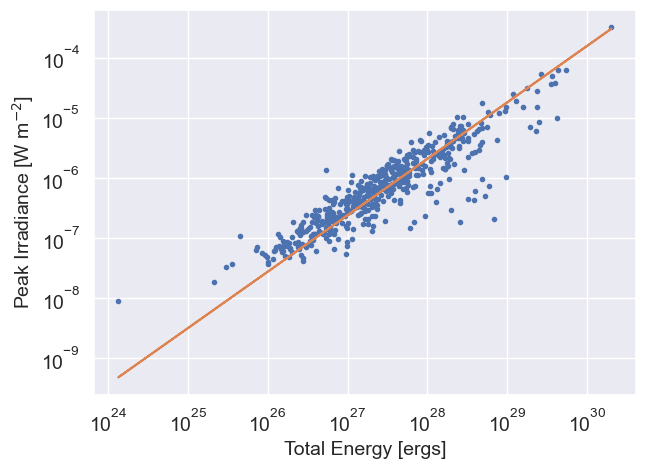

In [265]:
print("Peak vs Energy slope:", lr_IEalpha, " +- ", lr_IEstd_err)
best_fit_line = lr_IEbeta*(Energy_data.iloc[:,1]**lr_IEalpha)

fig, ax1 = plt.subplots(figsize=(7,5))
ax1.plot(Energy_data.iloc[:,1], Energy_data.iloc[:,0], '.', label='Energy data')
ax1.plot(Energy_data.iloc[:,1], best_fit_line, label=r'fit (A={:.2E}, $\alpha$={:0.2f}$\pm${:0.2f})'.format(lr_IEbeta, lr_IEalpha, lr_IEstd_err))

plt.xscale('log')
plt.yscale('log')
plt.ylabel('Peak Irradiance [W m$^{-2}$]', fontsize=fontsize)
plt.xlabel('Total Energy [ergs]', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.savefig('peak_irradiance_vs_energy.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()

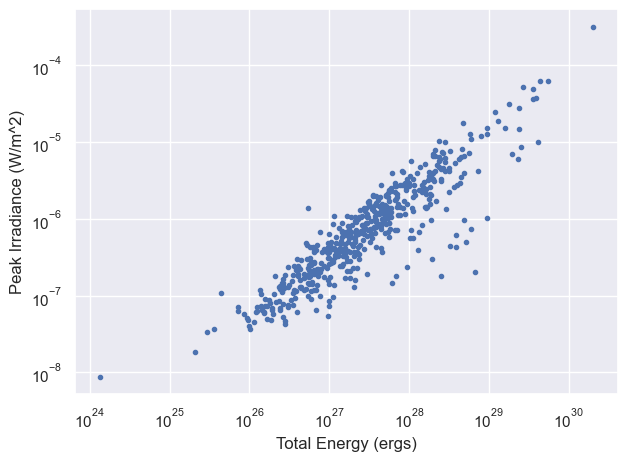

In [266]:
import matplotlib.pyplot as plt

# Plot the data collected by Energy_data as peak irradiance versus total energy
#plt.plot(Energy_data_old.iloc[:,1],Energy_data_old.iloc[:,0], 'rv')
plt.plot(Energy_data.iloc[:,1],Energy_data.iloc[:,0], '.')
# Plot on a log-log scale
plt.ylabel('Peak Irradiance (W/m^2)')
plt.xlabel('Total Energy (ergs)')
plt.xscale('log')
plt.yscale('log')

plt.show()

Here, is the code for flux frequency distribution, we'll use the expression that predicts flare frequency from peak irradiance. We can do this by computing the flare frequencies from the peak irradiance.

In [267]:
df_3=pd.read_csv('/Users/anilareddy/Downloads/peaks.csv')

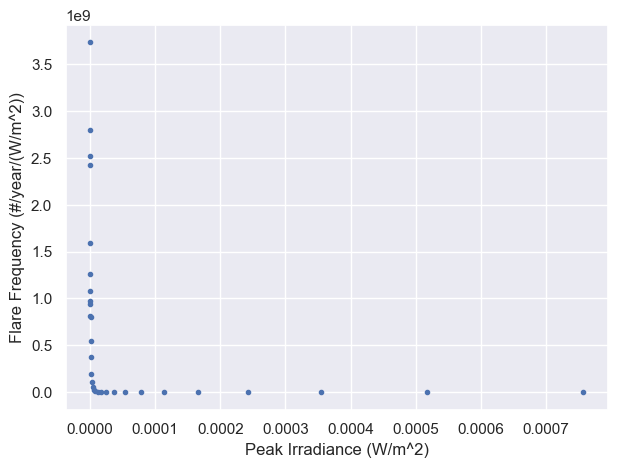

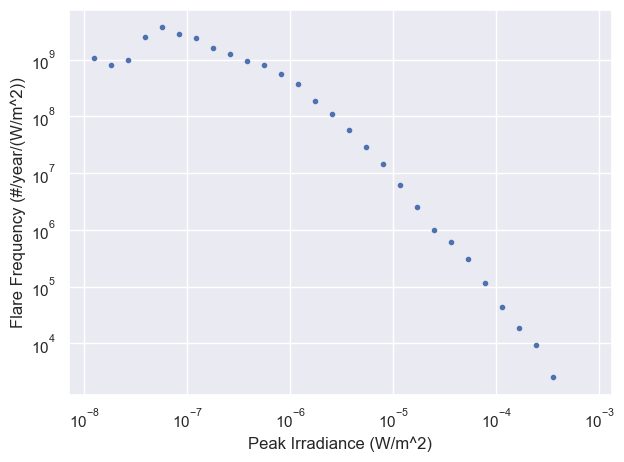

array([1.08072270e+09, 8.12766023e+08, 9.76648251e+08, 2.52123241e+09,
       3.73083198e+09, 2.79826780e+09, 2.41718497e+09, 1.59223369e+09,
       1.26228593e+09, 9.35908371e+08, 8.04660948e+08, 5.51237003e+08,
       3.72741446e+08, 1.89844944e+08, 1.11001860e+08, 5.79987846e+07,
       2.87341523e+07, 1.47619822e+07, 6.25511237e+06, 2.51870513e+06,
       9.86568777e+05, 6.00923711e+05, 3.10229839e+05, 1.14649040e+05,
       4.31113571e+04, 1.87566655e+04, 9.15980398e+03, 2.50498283e+03,
       0.00000000e+00, 0.00000000e+00])

array([1.08072270e+09, 8.12766023e+08, 9.76648251e+08, 2.52123241e+09,
       3.73083198e+09, 2.79826780e+09, 2.41718497e+09, 1.59223369e+09,
       1.26228593e+09, 9.35908371e+08, 8.04660948e+08, 5.51237003e+08,
       3.72741446e+08, 1.89844944e+08, 1.11001860e+08, 5.79987846e+07,
       2.87341523e+07, 1.47619822e+07, 6.25511237e+06, 2.51870513e+06,
       9.86568777e+05, 6.00923711e+05, 3.10229839e+05, 1.14649040e+05,
       4.31113571e+04, 1.87566655e+04, 9.15980398e+03, 2.50498283e+03])

-2.0242776645622937

-7.638912787027234

-0.9970151240736805

4.19386051355451e-18

0.04047403715265218

-2.0242776645622937

-7.638912787027234

-0.9970151240736805

4.19386051355451e-18

0.04047403715265218

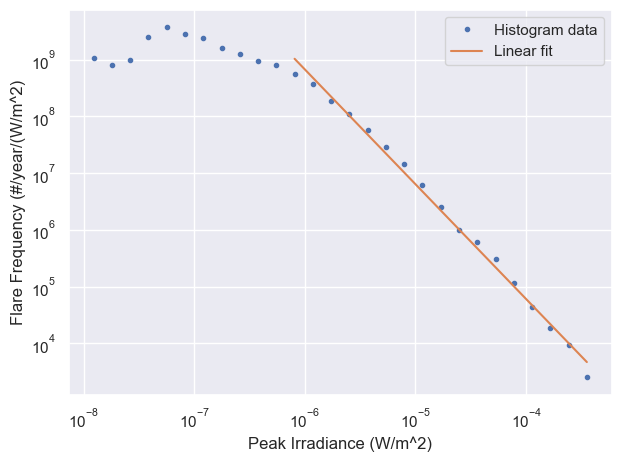

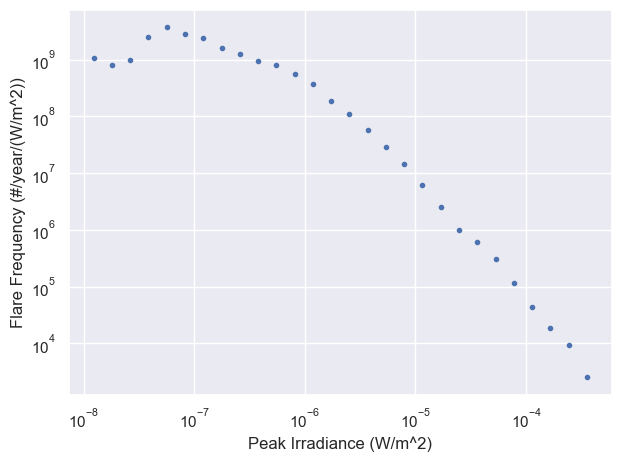

array([1.08072270e+09, 8.12766023e+08, 9.76648251e+08, 2.52123241e+09,
       3.73083198e+09, 2.79826780e+09, 2.41718497e+09, 1.59223369e+09,
       1.26228593e+09, 9.35908371e+08, 8.04660948e+08, 5.51237003e+08,
       3.72741446e+08, 1.89844944e+08, 1.11001860e+08, 5.79987846e+07,
       2.87341523e+07, 1.47619822e+07, 6.25511237e+06, 2.51870513e+06,
       9.86568777e+05, 6.00923711e+05, 3.10229839e+05, 1.14649040e+05,
       4.31113571e+04, 1.87566655e+04, 9.15980398e+03, 2.50498283e+03])

array([1.08072270e+09, 8.12766023e+08, 9.76648251e+08, 2.52123241e+09,
       3.73083198e+09, 2.79826780e+09, 2.41718497e+09, 1.59223369e+09,
       1.26228593e+09, 9.35908371e+08, 8.04660948e+08, 5.51237003e+08,
       3.72741446e+08, 1.89844944e+08, 1.11001860e+08, 5.79987846e+07,
       2.87341523e+07, 1.47619822e+07, 6.25511237e+06, 2.51870513e+06,
       9.86568777e+05, 6.00923711e+05, 3.10229839e+05, 1.14649040e+05,
       4.31113571e+04, 1.87566655e+04, 9.15980398e+03, 2.50498283e+03])

-2.0242776645622937

-7.638912787027234

-0.9970151240736805

4.19386051355451e-18

0.04047403715265218

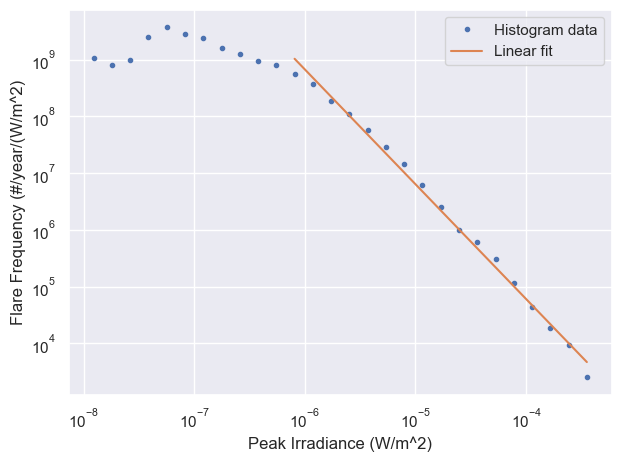

MLE
2.1046832172077945 ± 0.030983169104031292
Int64Index([], dtype='int64')
USING POWERLAW PACKAGE
Calculating best minimal value for power law fit
2.186211223558318 ± 0.04502796228409424
6.5981108e-06


In [285]:
#This plot will tell us the number of flares in each "bin" over 6 years 
n_bins =  30

bin_edge = np.geomspace(1e-8, 9e-4, n_bins+1) # Define bin edges logarithmically spaced apart

# Split peak irradiances into x number of bins
# the variable hist contains the total # of flares in each bin
# bin_edges contains the edge irradiance values of each of the bins
hist, bin_edges = np.histogram(df_3['Flux'], bins=bin_edge)

# Let's also calculate some properties of the histogram bins which we will use later

# Calculate bin widths from the bin edges
bin_widths = np.diff(bin_edges)

# Calculate bin centers from bin edges 
bin_centers = bin_edges[:-1] + np.diff(bin_edges)/2
# Two adjustments to the data

#Calculate for a single year instead of 6 years
num_flares_per_year = hist/6

# Calculate the number of flares over 6 years per bin width
num_flares_per_year_per_binwidth = num_flares_per_year/bin_widths

# Plot
plt.plot(bin_centers, num_flares_per_year_per_binwidth, '.')
plt.xlabel('Peak Irradiance (W/m^2)')
plt.ylabel('Flare Frequency (#/year/(W/m^2))')

plt.show()

import matplotlib.pyplot as plt

plt.plot(bin_centers, num_flares_per_year_per_binwidth, '.')
plt.xlabel('Peak Irradiance (W/m^2)')
plt.ylabel('Flare Frequency (#/year/(W/m^2))')
plt.xscale('log')
plt.yscale('log')
plt.show()

display(num_flares_per_year_per_binwidth)

import numpy as np

# List of the indices where # of flares per bin width is zero
index_of_zeros = np.where(num_flares_per_year_per_binwidth == 0)

# Delete the elements in bin_centers and num_of_flares_per_binwidth based on the
#  list of indices where um_of_flares_per_binwidth has a zero value
num_flares_per_year_per_binwidth = np.delete(num_flares_per_year_per_binwidth, index_of_zeros)
bin_centers = np.delete(bin_centers, index_of_zeros)
bin_edges = np.delete(bin_edges, index_of_zeros[0]+1)

display(num_flares_per_year_per_binwidth)

import numpy as np
import scipy.stats as stats

## Define the x and y data for the linear regression
x =  np.log(bin_centers[11:29])   
y =  np.log(num_flares_per_year_per_binwidth[11:29])  

PI2F_slope, PI2F_intercept, PI2F_r_value, PI2F_p_value, PI2F_std_err = stats.linregress(x, y)

display(PI2F_slope, PI2F_intercept, PI2F_r_value, PI2F_p_value, PI2F_std_err)



## Define the x and y data for the linear regression
x =  np.log(bin_centers[11:29])   
y =  np.log(num_flares_per_year_per_binwidth[11:29])  

PI2F_slope, PI2F_intercept, PI2F_r_value, PI2F_p_value, PI2F_std_err = stats.linregress(x, y)

display(PI2F_slope, PI2F_intercept, PI2F_r_value, PI2F_p_value, PI2F_std_err)

import numpy as np

## Calculate the best fit line using the slope and intercept given by the linear 
## regression function above.   
PI2F_best_fit_line = np.exp(PI2F_slope*np.log(bin_centers[11:29])+PI2F_intercept)


import matplotlib.pyplot as plt

## Plot the bin_centers versus flare_per_year_per_binwidth data and the best fit  
## line on the same graph to visualize the fit. Note, that we need to take the  
## exponential of the linear fit in order to translate it to a power law fit. 

plt.plot(bin_centers, num_flares_per_year_per_binwidth, '.')
plt.plot(bin_centers[11:29], PI2F_best_fit_line)#note the bin range here
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Peak Irradiance (W/m^2)')
plt.ylabel('Flare Frequency (#/year/(W/m^2)')
plt.legend(['Histogram data', 'Linear fit'])

plt.show()

import matplotlib.pyplot as plt

plt.plot(bin_centers, num_flares_per_year_per_binwidth, '.')
plt.xlabel('Peak Irradiance (W/m^2)')
plt.ylabel('Flare Frequency (#/year/(W/m^2))')
plt.xscale('log')
plt.yscale('log')
plt.show()

display(num_flares_per_year_per_binwidth)

import numpy as np

# List of the indices where # of flares per bin width is zero
index_of_zeros = np.where(num_flares_per_year_per_binwidth == 0)

# Delete the elements in bin_centers and num_of_flares_per_binwidth based on the
#  list of indices where um_of_flares_per_binwidth has a zero value
num_flares_per_year_per_binwidth = np.delete(num_flares_per_year_per_binwidth, index_of_zeros)
bin_centers = np.delete(bin_centers, index_of_zeros)
bin_edges = np.delete(bin_edges, index_of_zeros[0]+1)

display(num_flares_per_year_per_binwidth)


import numpy as np
import scipy.stats as stats

## Define the x and y data for the linear regression
x =  np.log(bin_centers[11:29])   
y =  np.log(num_flares_per_year_per_binwidth[11:29])  

PI2F_slope, PI2F_intercept, PI2F_r_value, PI2F_p_value, PI2F_std_err = stats.linregress(x, y)

display(PI2F_slope, PI2F_intercept, PI2F_r_value, PI2F_p_value, PI2F_std_err)

import numpy as np

## Calculate the best fit line using the slope and intercept given by the linear 
## regression function above.   
PI2F_best_fit_line = np.exp(PI2F_slope*np.log(bin_centers[11:29])+PI2F_intercept)

import matplotlib.pyplot as plt

## Plot the bin_centers versus flare_per_year_per_binwidth data and the best fit  
## line on the same graph to visualize the fit. Note, that we need to take the  
## exponential of the linear fit in order to translate it to a power law fit. 

plt.plot(bin_centers, num_flares_per_year_per_binwidth, '.')
plt.plot(bin_centers[11:29], PI2F_best_fit_line)#note the bin range here
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Peak Irradiance (W/m^2)')
plt.ylabel('Flare Frequency (#/year/(W/m^2)')
plt.legend(['Histogram data', 'Linear fit'])

plt.show()

def calculate_alpha_and_sigma_with_mle(x, x_min):
  n = len(x)
  alpha = 1 + n / np.sum(np.log(x/x_min))
  sigma = ((alpha - 1) / np.sqrt(n)) + (1/n)
  return alpha, sigma

data = df_3['Flux']
x_min = 3.5e-6
indices = np.where(data > x_min)
alpha_peaks, sigma_peaks = calculate_alpha_and_sigma_with_mle(data.iloc[indices], x_min)
print('MLE')
print(alpha_peaks, '±', sigma_peaks)

nan_indices = df_3['Flux'].index[df_3['Flux'].isna()]

print(nan_indices)

print('USING POWERLAW PACKAGE')
import powerlaw
data = df_3['Flux'].values
results = powerlaw.Fit(data)
print(results.power_law.alpha, '±', results.power_law.sigma)
print(results.power_law.xmin)


We want a relationship between flare energy and flare frequency, so we'll use the expression that predicts flare frequency from peak irradiance.

In [269]:
import numpy as np

## Calculate the flare frequency using the expression from last week 
Ifreq = np.exp(PI2F_slope*np.log(Energy_data.iloc[:,0]) + PI2F_intercept)

In [270]:
import numpy as np

Energy_data = Energy_data[Energy_data.iloc[:, 0] > 0]

# Display the resulting DataFrame
print(Energy_data)

# Calculate the flare frequency using the expression
Ifreq = np.exp(PI2F_slope*np.log(Energy_data.iloc[:,0]) + PI2F_intercept)


        irradiance  flare_energy
1747  8.628242e-08  9.846790e+26
7158  3.626014e-06  1.894358e+28
7419  4.675396e-06  2.344703e+28
3953  3.752178e-07  9.515195e+26
1323  5.033679e-08  1.652608e+26
...            ...           ...
8701  7.267651e-07  4.477725e+27
956   3.522675e-06  4.540768e+28
4591  3.638813e-07  1.580095e+27
7881  8.934261e-07  5.641084e+27
67    3.785867e-07  1.739069e+27

[500 rows x 2 columns]


In [271]:
print(Energy_data['flare_energy'].describe())

count    5.000000e+02
mean     2.063668e+28
std      1.053009e+29
min      1.337872e+24
25%      6.937482e+26
50%      2.558062e+27
75%      8.862096e+27
max      2.028601e+30
Name: flare_energy, dtype: float64


In [272]:
Energy_data.reset_index(drop=True, inplace=True)

**process of converting flare frequency from units of flares per year per (W/m²) to flares per year per erg.**


Flare frequency is typically measured in terms of the number of flares occurring per unit time (usually per year).
The total energy released by a flare is given by the flare’s radiative output, which can be expressed in terms of the flare’s irradiance (energy per unit area) and the area over which it is emitted.

We have flare frequency data in units of flares per year per (W/m²).
We want to express flare frequency in units of flares per year per erg.
Conversion Steps:

We’ll start by considering the relationship between energy and irradiance:
Energy (E) = Irradiance (I) × Area (A)
Flare frequency (F) is related to the total energy (E) as follows:
F = dE/dt (where dt represents the time interval, usually 1 year)
We want to find the relationship between F and E.

Mathematical Approach:
Assume that flare energy follows a power-law relationship with irradiance:
E = βIᵅ
Take the natural logarithm of both sides:
ln(E) = ln(β) + α ln(I)
This equation is linear in terms of ln(E) and ln(I).

Linear Regression:
We perform a linear regression on the data points (ln(I), ln(E)) to find the slope (m) and intercept (b) of the best-fit line:
ln(E) = m ln(I) + b
The slope (m) corresponds to α, and the intercept (b) corresponds to ln(β).
Inverting the Relationship:

We invert the slope to find α:
α = 1/m
We calculate β using the intercept:
β = e^(-b/m)

Uncertainty Propagation:
We can calculate the uncertainties in α and β:
∂α = -1/m² ∂m
∂β = sqrt((be^(-b/m)/m² ∂m)² + (-e^(-b/m)/m ∂b)²)

In [273]:
lr_EIslope, lr_EIintercept, lr_EIr_value, lr_EIp_value, lr_EIstd_err = stats.linregress(np.log(Energy_data.iloc[:,0]), np.log(Energy_data.iloc[:,1]))

# Invert to find relationship of I(E)
lr_IEalpha = 1/lr_EIslope
lr_IEstd_err = (1/(lr_EIslope)**2)*(lr_EIstd_err) # Error propogation to determine SE of alphaIE # AAY+JPM: we removed the minus in "-1" that was here b/c this can only be positive since it _should_ be the square root of the squares so no negative numbers can survive
lr_IEbeta = np.exp(-lr_EIintercept/lr_EIslope)

print("Linear regression on energy versus peak; alpha:", lr_EIslope, " +- ", lr_EIstd_err)
print("Linear regression on peak versus energy; alpha:", lr_IEalpha, " +- ", lr_IEstd_err)

Linear regression on energy versus peak; alpha: 1.1152634023910692  +-  0.023776430598203654
Linear regression on peak versus energy; alpha: 0.8966491663368938  +-  0.0191157681930916


 we can use these values to calculate the "per erg" frequency from the "per W/m^2" frequency and propogate the errors through.

In [274]:
# Calculate the "per erg" frequency from the "per W/m^2" frequency

#This fit gives us I(E) as a power law
#Calculate dI/dE from this power law with basic calc
lr_IEderivs = (lr_IEbeta*lr_IEalpha)*Energy_data.iloc[:,1]**(lr_IEalpha-1)
# Error propogation to determine SE of dI/dE
#lr_IEderivs_err = (lr_IEbeta*Energy_data.iloc[:,1]**(lr_IEalpha-1))*((lr_IEalpha-1)*lr_IEalpha*np.log(Energy_data.iloc[:,1])+2*lr_IEalpha-1)*lr_IEstd_err
# The above isn't consistent with what's written in the PDF equation 7. Below is consistent: 
#lr_IEderivs_err = (lr_IEbeta*Energy_data.iloc[:,1]**(lr_IEalpha-1))*(lr_IEalpha*np.log(Energy_data.iloc[:,1]) + 1)*lr_IEstd_err
lr_IEderivs_err = (lr_IEbeta*Energy_data.iloc[:,1]**(lr_IEalpha-1)) * (Energy_data.iloc[:,1]**(lr_IEalpha-1)) * (np.log(Energy_data.iloc[:,1]))*lr_IEstd_err # 2023-01-09: AAY+JPM rederived this again after noticing that the values were _larger_ than lr_IEderivs, which didn't seem like it could be right. This calculation does have smaller values as expected.

#Calculate frequencies from energy at each point using the first fit (above)
Ifreq = np.exp(PI2F_slope*np.log(Energy_data.iloc[:,0]) + PI2F_intercept)
# Error propogation to determine SE of Ifreq
#Ifreq_err = np.log(Energy_data.iloc[:,0])*PI2F_slope*np.exp(PI2F_slope-1)*PI2F_std_err
# AAY+JPM: The above seems to be an error in taking the derivative in the exponential. Below is what we think is right but we note that the impact on alpha was only at the third decimal point. 
Ifreq_err = np.sqrt(np.log(Energy_data.iloc[:,0])**2 * Ifreq**2 *PI2F_std_err**2)


#Apply the chain rule: dn/dE = (dn/dI)*(dI/dE)
Efreq = Ifreq*lr_IEderivs
# Error propogation to determine SE of Efreq
Efreq_err = np.sqrt((lr_IEderivs_err*Ifreq)**2 + (Ifreq_err*lr_IEderivs)**2)

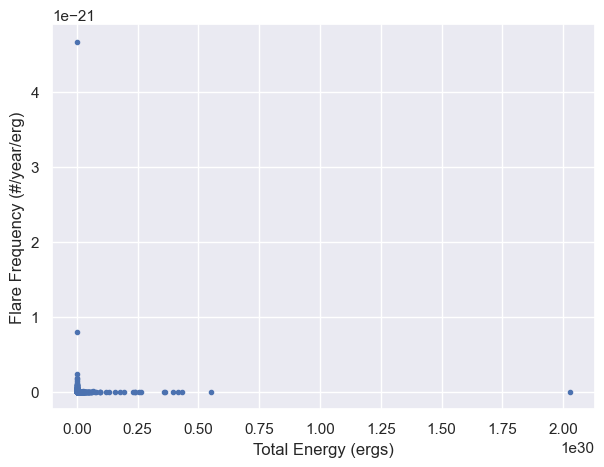

In [275]:
## Plot the flare frequency versus the total flare energy of the class data on
## a linear scale. The flare frequency should be the y data and the total flare
## energy should be the x data.

plt.plot(Energy_data.iloc[:,1], Efreq, '.')
plt.xlabel('Total Energy (ergs)')
plt.ylabel('Flare Frequency (#/year/erg)')

plt.show()

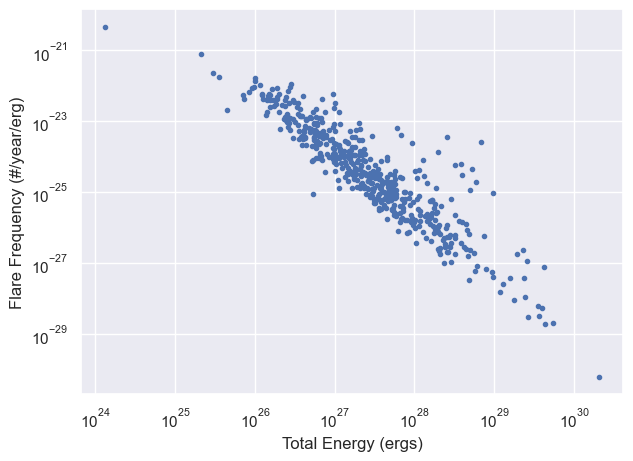

In [276]:
## Plot the flare frequency versus the total flare energy of the class data on
## a log-log scale. The flare frequency should be the y data and the total flare
## energy should be the x data.

plt.plot(Energy_data.iloc[:,1], Efreq, '.')
plt.xlabel('Total Energy (ergs)')
plt.ylabel('Flare Frequency (#/year/erg)')
plt.xscale('log')
plt.yscale('log')

plt.show()

**Finding power law relationship between total energy and flare frequency**

We use a weighted least squares regression with the weights being the standard errors of `Efreq` that we calcualted above.

Like before, $E$, the independent variable, has more uncertainty in it than $f_E$ (`Efreq`) the dependent variable. However, traditional linear fitting algotithms assume that all the "error" is in the dependent variable, so we are going to find the relationship of $E(f_E)$ and then invert it.  

In [277]:
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
import statsmodels.api as sm
from matplotlib import pyplot

# reformat dataset
X = np.log(Efreq)      ## the x data for the linear regression is the frequency/year/erg
y = np.log(Energy_data.iloc[:,1])    # the y data for the linear regression is the energies ("E")
w = Efreq_err/Efreq   # Need to divide by Efreq since we are taking the linear regession of the logs

X = X.to_numpy()
y = y.to_numpy()

X = np.reshape(X, (-1,1))

In [278]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
model = LinearRegression()

reg = model.fit(X, y,  sample_weight=w)

slope = reg.coef_
intercept = reg.intercept_

# invert the function to find the relationship of Efreq(E) 
# calculate alpha and beta  
alpha_linearreg = 1/slope
beta = np.exp(-intercept/slope)

print("Linear regression slope:", slope)
print("Linear regression alpha:", alpha_linearreg)

Linear regression slope: [-0.52937338]
Linear regression alpha: [-1.88902584]


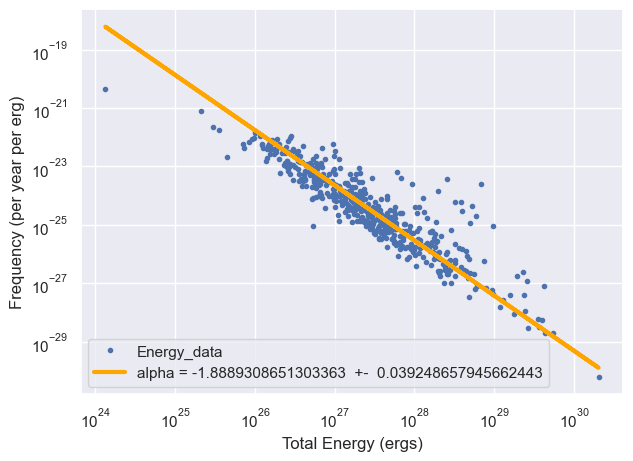

In [279]:
import matplotlib.pyplot as plt

## Best fit line
best_fit_line = beta*(Energy_data.iloc[:,1]**alpha_linear)

fig, ax = plt.subplots()

## Plot the data with the best fit line on a log-log scale and inlcude a legend
ax.plot(Energy_data.iloc[:,1], Efreq, '.')
ax.plot(Energy_data.iloc[:,1], best_fit_line, color='orange', linewidth=3)

plt.xscale('log')
plt.yscale('log')
plt.ylabel('Frequency (per year per erg)')
plt.xlabel('Total Energy (ergs)')

## You need to fill in the value for alpha (Hint: "alpha" is the slope you found
## in the linregress function)
plt.legend(['Energy_data', 'alpha = -1.8889308651303363  +-  0.039248657945662443']) 

plt.show()

In [280]:
def calculate_alpha_and_sigma_with_mle(x, x_min):
  n = len(x)
  alpha = 1 + n / np.sum(np.log(x/x_min))
  sigma = ((alpha - 1) / np.sqrt(n)) + (1/n)
  return alpha, sigma

In [281]:
data = Energy_data['flare_energy']
x_min = 1.4e28
indices = np.where(data > x_min)
alpha, sigma = calculate_alpha_and_sigma_with_mle(data.iloc[indices], x_min)
print(alpha, '±', sigma)

1.9177162685976197 ± 0.10177162685976196


In [282]:
import powerlaw
data = Energy_data['flare_energy'].values
results = powerlaw.Fit(data)
print('alpha = ', results.power_law.alpha, '±', results.power_law.sigma)
print('x_min = ', results.power_law.xmin)

Calculating best minimal value for power law fit
alpha =  1.9424477940393128 ± 0.09424477940393128
x_min =  1.440610399147413e+28


In [284]:
print('Linear fit:            ', abs(alpha_linearreg), '±', std_err)
print("D'Huys+ 2016 equations:", alpha, '±', results.power_law.sigma)
print('`powerlaw` package:    ', results.power_law.alpha, '±', results.power_law.sigma)

Linear fit:             [1.88902584] ± 0.039248657945662443
D'Huys+ 2016 equations: 1.9177162685976197 ± 0.09424477940393128
`powerlaw` package:     1.9424477940393128 ± 0.09424477940393128
